In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [9]:
batch_size = 32
img_height = 200
img_width = 200
data_dir = "datasets/imgs"

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4042 files belonging to 2 classes.
Using 3234 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4042 files belonging to 2 classes.
Using 808 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['awake', 'drowsy']


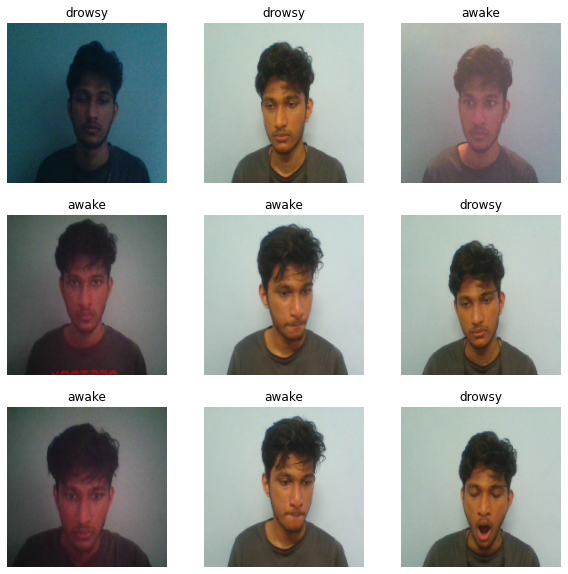

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Creating the model

In [27]:
model = keras.Sequential([
    layers.Input(shape=(200, 200, 3)),
    layers.experimental.preprocessing.Rescaling(1.0/255.0),
    layers.Conv2D(32, 3, activation='relu'), # (1, 200, 200, 3) -> (1, 198, 198, 32)
    layers.Conv2D(64, 5, activation='relu'), # (1, 198, 198, 32) -> (1, 194, 194, 64)
    layers.MaxPooling2D(), # (1, 194, 194, 64) -> (1, 97, 97, 64)
    layers.Conv2D(128, 7, activation='relu'), # (1, 97, 97, 64) -> (1, 91, 91, 128)
    layers.BatchNormalization(),
    layers.Conv2D(64, 5, activation='relu'), # (1, 91, 91, 128) -> (1, 87, 87, 64)
    layers.MaxPooling2D(), # (1, 87, 87, 64) -> (1, 43, 43, 64)
    layers.Conv2D(32, 3, activation='relu'), # (1, 43, 43, 64) -> (1, 41, 41, 32)
    layers.BatchNormalization(),
    layers.Conv2D(16, 1, activation='relu', padding='same'), # (1, 41, 41, 32) -> (1, 41, 41, 16)
    layers.MaxPooling2D(), # (1, 41, 41, 16) -> (1, 20, 20, 16)
    layers.Conv2D(10, 7, activation='relu'), # (1, 20, 20, 16) -> (1, 14, 14, 10)
    layers.MaxPooling2D(), # (1, 14, 14, 24) -> (1, 7, 7, 10)
    layers.Flatten(), # (1, 7, 7, 10) -> (1, 490)
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(train_ds.class_names), activation='softmax'),

])

model.compile(
    optimizer='adam', 
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy', keras.metrics.categorical_crossentropy])

In [30]:
model = keras.Sequential([
    layers.Input(shape=(200, 200, 3)),
    layers.experimental.preprocessing.Rescaling(1.0/255.0),
    layers.Conv2D(32, 3, activation='relu'), # (1, 200, 200, 3) -> (1, 198, 198, 32)
    layers.Conv2D(64, 5, activation='relu'), # (1, 198, 198, 32) -> (1, 194, 194, 64)
    layers.MaxPooling2D(), # (1, 194, 194, 64) -> (1, 97, 97, 64)
    layers.Conv2D(128, 7, activation='relu'), # (1, 97, 97, 64) -> (1, 91, 91, 128)
    layers.BatchNormalization(),
    layers.Conv2D(64, 5, activation='relu'), # (1, 91, 91, 128) -> (1, 87, 87, 64)
    layers.MaxPooling2D(), # (1, 87, 87, 64) -> (1, 43, 43, 64)
    layers.Conv2D(32, 3, activation='relu'), # (1, 43, 43, 64) -> (1, 41, 41, 32)
    layers.BatchNormalization(),
    layers.Conv2D(16, 1, activation='relu', padding='same'), # (1, 41, 41, 32) -> (1, 41, 41, 16)
    layers.MaxPooling2D(), # (1, 41, 41, 16) -> (1, 20, 20, 16)
    layers.Conv2D(24, 7, activation='relu'), # (1, 20, 20, 16) -> (1, 14, 14, 24)
    layers.MaxPooling2D(), # (1, 14, 14, 24) -> (1, 7, 7, 10)
    layers.Flatten(), # (1, 7, 7, 10) -> (1, 490)
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(train_ds.class_names), activation='softmax'),

])

model.compile(
    optimizer='adam', 
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy', keras.metrics.categorical_crossentropy])

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 194, 194, 64)      51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 97, 97, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 91, 91, 128)       401536    
_________________________________________________________________
batch_normalization_12 (Batc (None, 91, 91, 128)       512       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 87, 87, 64)       

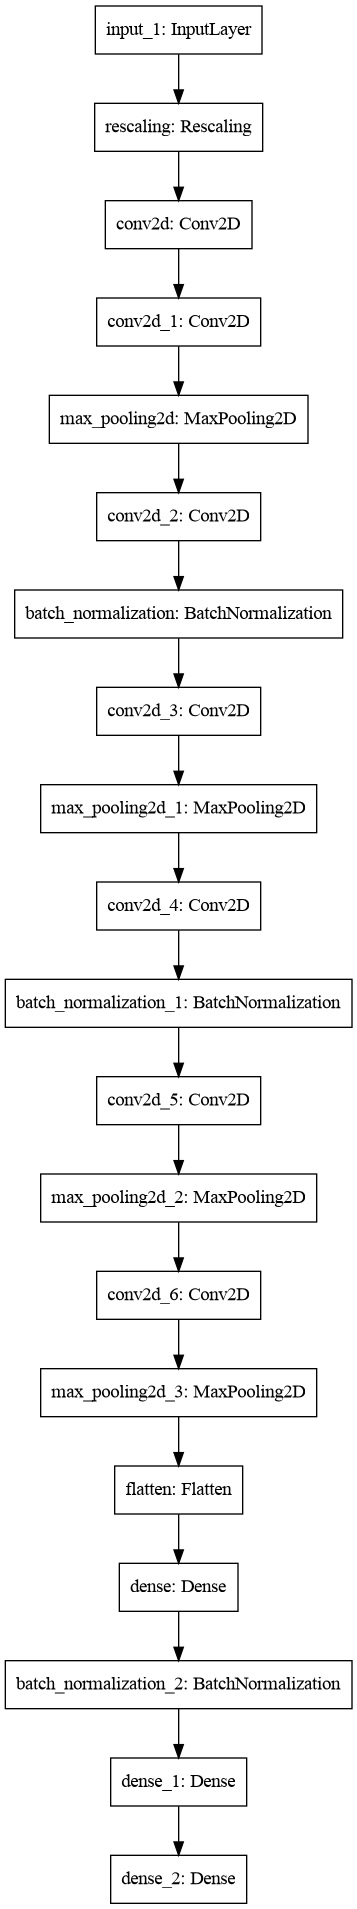

In [17]:
keras.utils.plot_model(model)

In [32]:
model.save("models/drowzee_det")

INFO:tensorflow:Assets written to: models/drowzee_det/assets
